In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

In [2]:
# load the roster (for race + gender info)
roster = pd.read_csv('../final/roster.csv')
roster.head()

,last_name,first_name,middle_initial,gender,race,birthyear,age,status,appointment_date,position_no,...,star7,star8,star9,star10,star11,sworn,unit_id,unit_detail,star,uid
0,HANSEN,GRACIBEL,NaN,F,WHITE HISPANIC,1973.0,44.0,Y,2004-10-25,9161,...,NaN,NaN,NaN,NaN,NaN,Y,13.0,NaN,5512.0,2162b5ba-fd29-4474-8c70-455fb642bb1f
1,AARON,JEFFERY,M,M,WHITE,1971.0,46.0,Y,2005-09-26,9171,...,NaN,NaN,NaN,NaN,NaN,Y,21.0,NaN,1424.0,c251a31d-030f-40a0-900e-4dc7f6f86d51
2,AARON,KARINA,NaN,F,WHITE HISPANIC,1980.0,37.0,Y,2005-09-26,9165,...,NaN,NaN,NaN,NaN,NaN,Y,194.0,NaN,20373.0,f6aedb8d-3c01-4838-a3a9-b50cee054a1b
3,ABATE,DANIEL,P,M,WHITE,1942.0,75.0,N,1970-06-15,9161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,549d5ddc-9e5a-4b12-9ab0-022c6dbca249
4,ABBATE,ANTHONY,G,M,WHITE,1968.0,48.0,N,1994-12-05,9161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cfae6371-0e9a-4382-b35c-19c52f2dfb4a


In [3]:
# load the complaints
complaints  = pd.read_csv('../final/complaints.csv')
complaints.head()

/Users/lorenzomasoero/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,complaint_no,beat,location_code,street_no,street_name,apt_no,city,incident_datetime,complaint_date,closed_date
0,258996,1524,04,5327.0,W CHICAGO,NaN,CHICAGO IL,2000-01-01 01:20:00,2000-01-01,2001-01-26
1,258997,1115,17,4316.0,W JACKSON,NaN,CHICAGO IL,2000-01-01 01:30:00,2000-01-01,2000-10-14
2,258998,1834,17,500.0,W ILLINOIS,NaN,CHICAGO IL,2000-01-01 00:28:00,2000-01-01,2001-01-18
3,258999,0,17,NaN,NaN,NaN,CHICAGO IL,2000-01-01 03:30:00,2000-01-01,2000-03-23
4,259000,1524,04,5327.0,W CHICAGO AVE,NaN,CHICAGO IL,2000-01-01 05:00:00,2000-01-01,2001-01-17


In [4]:
# load the complaints officers
complaints_offs = pd.read_csv('../final/complaints_officers.csv')
complaints_offs

,complaint_no,complaint_category,finding,discipline,final_finding,final_discipline,uid
0,258996,01A-USE OF PROFANITY,NS,600.0,NS,600.0,38461cb6-c940-4367-abea-1f6b9fab7821
1,258997,01A-USE OF PROFANITY,UN,600.0,UN,600.0,5200d23d-9f4c-49fe-8e56-dc699321c230
2,262303,05A-ARRESTEE - DURING ARREST,NS,600.0,NS,600.0,5200d23d-9f4c-49fe-8e56-dc699321c230
3,266975,08N-MISCELLANEOUS,NS,600.0,NS,600.0,5200d23d-9f4c-49fe-8e56-dc699321c230
4,267840,10P-MISUSE OF DEPARTMENT EQUIPMENT/SUPPLIES,SU,2.0,SU,1.0,5200d23d-9f4c-49fe-8e56-dc699321c230
...,...,...,...,...,...,...,...
125576,1020501,03B-SEARCH OF PERSON WITHOUT WARRANT,NS,600.0,EX,600.0,4f6e7036-0154-40cc-888d-bce19fb52770
125577,1025409,03C-SEARCH OF PREMISE/VEHICLE WITHOUT WARRANT,NaN,600.0,NaN,600.0,4f6e7036-0154-40cc-888d-bce19fb52770
125578,1030828,05A-ARRESTEE - DURING ARREST,NaN,600.0,NaN,600.0,4f6e7036-0154-40cc-888d-bce19fb52770
125579,1044128,10Z-MISCELLANEOUS,SU,400.0,SU,400.0,4f6e7036-0154-40cc-888d-bce19fb52770


In [5]:
year_range = min(pd.to_datetime(complaints['complaint_date'].values).year), max(pd.to_datetime(complaints['complaint_date'].values).year)
length = 1+year_range[1]-year_range[0]
events_per_year = np.bincount(pd.to_datetime(complaints['complaint_date'].values).year)[-length:]
events_per_month = np.bincount(pd.to_datetime(complaints['complaint_date'].values).month)[1:]
events_per_day = np.bincount(pd.to_datetime(complaints['complaint_date'].values).weekday)
hours = pd.to_datetime(complaints['complaint_date'].values).hour
hours = np.nan_to_num(hours, nan=24)
events_per_hour = np.bincount(hours.astype(int))

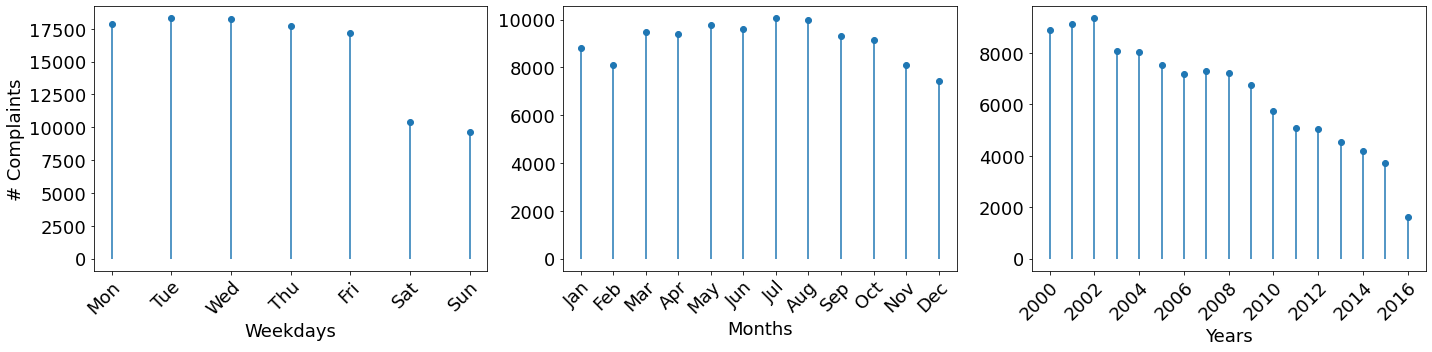

In [6]:
plt.figure(figsize = (20,5))

ax=plt.subplot(131)

plt.scatter(np.arange(len(events_per_day)), events_per_day)
plt.vlines(x = np.arange(len(events_per_day)), ymin = np.zeros(len(events_per_day)), ymax = events_per_day)
dayticks = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(len(events_per_day)), dayticks, fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel('# Complaints', fontsize = 18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right", rotation_mode="anchor") 
plt.xlabel('Weekdays', fontsize = 18)

ax=plt.subplot(132)

plt.scatter(np.arange(len(events_per_month)), events_per_month)
plt.vlines(x = np.arange(len(events_per_month)), ymin = np.zeros(len(events_per_month)), ymax = events_per_month)
monthticks = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(len(events_per_month)), monthticks, fontsize = 18)
plt.yticks(fontsize = 18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right", rotation_mode="anchor") 
plt.xlabel('Months', fontsize = 18)

ax = plt.subplot(133)
plt.scatter(np.arange(year_range[0], year_range[1]+1, dtype = int), events_per_year)
plt.vlines(x = np.arange(year_range[0], year_range[1]+1, dtype = int), ymin = np.zeros(len(events_per_year)), ymax = events_per_year)
plt.xlabel('Years', fontsize = 18)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha="right", rotation_mode="anchor") 
plt.tight_layout()
# plt.savefig('../doc/figs/complaints_times.pdf', dpi=1000, bbox_inches = 'tight')
plt.show()

In [7]:
# create a map of shortnames of races
races_short = {'WHITE' : 'White', 
              'BLACK' : 'Black',
              'BLACK HISPANIC' : 'Bl. Hisp.',
              'WHITE HISPANIC' : 'Wh. Hisp.',
              'ASIAN/PACIFIC ISLANDER' : 'Asian/P.I.',
              'AMER IND/ALASKAN NATIVE' : 'Indig.',
              'Other' : 'Other'}

In [8]:
# build a map of UID -> (race, gender)
trait_map = {}
traits = ['race', 'gender']

for i in range(roster.shape[0]):
    trait_map[roster.uid.iloc[i]] = {tr : roster[tr].iloc[i] for tr in traits}

# for each trait, add a column to the complaints_offs data using the map
for tr in traits:
    complaints_offs[tr] = complaints_offs.uid.map(lambda x : trait_map[x][tr])
    
# in the below plots, Asian/Pacific Islander, Indigenous, and Black Hispanic categories are too small to get reliable awards ratios.
# group them into "Other"
complaints_offs.race = complaints_offs.race.map(lambda x : 'Other' if x in ['ASIAN/PACIFIC ISLANDER', 'AMER IND/ALASKAN NATIVE', 'BLACK HISPANIC'] else x)
roster.race = roster.race.map(lambda x : 'Other' if x in ['ASIAN/PACIFIC ISLANDER', 'AMER IND/ALASKAN NATIVE', 'BLACK HISPANIC'] else x)

In [9]:
# aggregate the number of unique officers in each (race, gender) category
num_offs = roster.groupby(['race', 'gender']).agg(['count'])
num_offs.reset_index(inplace=True)
num_offs['count'] = num_offs['uid']['count']
# fix tuple colnames
num_offs.columns = num_offs.columns.map(''.join)
# restrict the dataframe to just (race, gender, count)
num_offs = num_offs[['race', 'gender', 'count']]
num_offs = num_offs.rename(columns = {'count' : 'officers'})
# remove the 'X' gender (by visual inspection, these should be missing data -- not nonbinary genders)
num_offs = num_offs[num_offs.gender != 'X']
# replace races with shortnames
num_offs.race = num_offs.race.map(races_short)
num_offs.reset_index(inplace=True)
num_offs

,index,race,gender,officers
0,0,Black,F,2732
1,1,Black,M,5867
2,2,Other,F,95
3,3,Other,M,563
4,4,White,F,3005
5,5,White,M,18041
6,7,Wh. Hisp.,F,1128
7,8,Wh. Hisp.,M,3683


In [10]:
# aggregate the number of complaints in each (race, gender) category
num_compls = complaints_offs.groupby(['race', 'gender']).agg(['count'])
num_compls.reset_index(inplace=True)
num_compls['count'] = num_compls['uid']['count']
# fix tuple colnames
num_compls.columns = num_compls.columns.map(''.join)
# restrict to just these columns
num_compls = num_compls[['race', 'gender', 'count']]
num_compls = num_compls.rename(columns = {'count' : 'complaints'})
# replace races with shortnames
num_compls.race = num_compls.race.map(races_short)
num_compls.reset_index(inplace=True)
num_compls

,index,race,gender,complaints
0,0,Black,F,6549
1,1,Black,M,24431
2,2,Other,F,190
3,3,Other,M,2812
4,4,White,F,7914
5,5,White,M,59823
6,6,Wh. Hisp.,F,2892
7,7,Wh. Hisp.,M,20938


In [11]:
# join the two data frames and remove duplicated columns
cc = pd.concat([num_offs, num_compls], axis=1)
cc = cc.loc[:, ~cc.columns.duplicated()]
# compute the number of awards per officer in each category
cc['frac'] = cc['complaints']/cc['officers']
cc

,index,race,gender,officers,complaints,frac
0,0,Black,F,2732,6549,2.397145
1,1,Black,M,5867,24431,4.164138
2,2,Other,F,95,190,2.000000
3,3,Other,M,563,2812,4.994671
4,4,White,F,3005,7914,2.633611
5,5,White,M,18041,59823,3.315947
6,7,Wh. Hisp.,F,1128,2892,2.563830
7,8,Wh. Hisp.,M,3683,20938,5.685039


In [ ]:
# generate the plot
sns.set_style('whitegrid')
ax = sns.barplot(x = 'race', y = 'frac', hue = 'gender', data = cc)
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")
plt.ylabel('Complaints per Officer')
plt.xlabel('CPD Race Category')
ax.get_legend().set_title('CPD Gender Category')
plt.tight_layout()
plt.savefig('../doc/figs/complaints.pdf')

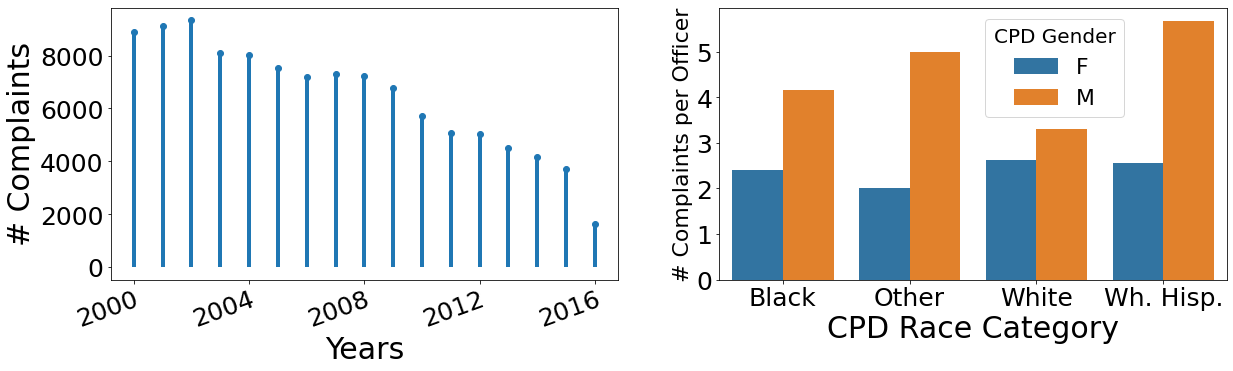

In [23]:
plt.figure(figsize = (20,5))
# sns.set_style('whitegrid')
import matplotlib as mpl
# mpl.style.use('classic')
ax = plt.subplot(121)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(6))

plt.scatter(np.arange(year_range[0], year_range[1]+1, dtype = int), events_per_year)
plt.vlines(x = np.arange(year_range[0], year_range[1]+1, dtype = int), ymin = np.zeros(len(events_per_year)), ymax = events_per_year, lw = 4)
plt.xlabel('Years', fontsize = 30)
plt.ylabel('# Complaints', fontsize= 30)
plt.xticks(fontsize=25)
plt.yticks(fontsize = 25)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=20, ha="right", rotation_mode="anchor") 
plt.subplot(122)
ax = sns.barplot(x = 'race', y = 'frac', hue = 'gender', data = cc)
plt.xticks(rotation=0, ha="center", rotation_mode="anchor", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize = 25)
plt.ylabel('# Complaints per Officer', fontsize =22)
plt.xlabel('CPD Race Category', fontsize = 30)
plt.legend(fontsize = 22, loc='upper right', bbox_to_anchor=(.82, 1.0))
ax.get_legend().set_title('CPD Gender', prop={'size':20})
plt.savefig('../doc/figs/complaints_years_race_gender.pdf', bbox_inches = 'tight', dpi = 1000)
plt.show()